In [5]:
pip install scikit-learn

     |████████████████████████████████| 13.4MB 4.9MB/s eta 0:00:01
     |████████████████████████████████| 38.6MB 110.0MB/s eta 0:00:01
     |████████████████████████████████| 307kB 80.9MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
from fosforml.model_manager.snowflakesession import get_session
my_session = get_session()
 
table_name = '"SOLUTION_TABLE"'
 
sf_df = my_session.sql("select * from {}".format(table_name))
data = sf_df.to_pandas()

In [2]:
!pip install fosforml

     |████████████████████████████████| 51kB 5.2MB/s eta 0:00:011
     |████████████████████████████████| 10.9MB 10.7MB/s eta 0:00:01MB 10.7MB/s eta 0:00:01
     |████████████████████████████████| 1.9MB 110.9MB/s eta 0:00:01
     |████████████████████████        | 30.0MB 79.6MB/s eta 0:00:01Collecting catboost<1.3,>=1.2.0
     |████████████████████████████████| 98.7MB 341kB/s  eta 0:00:01
     |████████████████████████████████| 2.5MB 109.5MB/s eta 0:00:01
     |████████████████████████████████| 1.4MB 106.5MB/s eta 0:00:01
     |████████████████████████████████| 174kB 91.1MB/s eta 0:00:01
     |████████████████████████████████| 133kB 96.8MB/s eta 0:00:01
     |████████████████████████████████| 200.3MB 128kB/s s eta 0:00:01
     |████████████████████████████████| 81kB 31.1MB/s eta 0:00:01
     |████████████████████████████████| 1.6MB 94.2MB/s eta 0:00:01
     |████████████████████████████████| 8.3MB 63.3MB/s eta 0:00:01
     |████████████████████████████████| 51kB 21.6MB/s eta 0:00:01
  

In [2]:
from fosforml.model_manager.snowflakesession import get_session
my_session = get_session()
 
table_name = '"SOLUTION_TABLE"'
 
sf_df = my_session.sql("select * from {}".format(table_name))
data = sf_df.to_pandas()

In [12]:
data.columns

Index(['PRODUCT_ID', 'Car_Company', 'YIELD_RATE', 'SHIFT', 'MACHINE_ID',
       'OPERATOR_ID', 'MATERIAL_BATCH', 'TEMPERATURE', 'HUMIDITY', 'DOWNTIME',
       'DEFECT_COUNT', 'MAINTENANCE_SCHEDULE', 'TRACK_OUT_DATE',
       'MANUFACTURE_DATE', 'MODEL_NAME', 'YEAR_OF_MANUFACTURE', 'ENGINE_TYPE',
       'FUEL_TYPE', 'TRANSMISSION_TYPE', 'BODY_STYLE', 'Price', 'Mileage',
       'SEATING_CAPACITY', 'COLOR_OPTIONS', 'SAFETY_FEATURES',
       'Warranty_Period', 'Horsepower', 'Torque', 'Top_Speed', 'Acceleration',
       'Dimensions', 'Weight', 'Fuel_Tank_Capacity'],
      dtype='object')

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [17]:
data['TRACK_OUT_DATE'] = pd.to_datetime(data['TRACK_OUT_DATE'])

In [18]:
# Prepare data for product type prediction
X_product_type = data['TRACK_OUT_DATE']  # Add relevant features
y_product_type = data['Car_Company']

X_train, X_test, y_train, y_test = train_test_split(X_product_type, y_product_type, test_size=0.2)

# Train a Random Forest Classifier
model_product_type = RandomForestClassifier()
model_product_type.fit(X_train, y_train)

# Predict future product types
future_dates = pd.date_range(start=max(data['TRACK_OUT_DATE']), periods=6, freq='M')
future_data = pd.DataFrame({'TRACK_OUT_DATE': future_dates})
future_predictions = model_product_type.predict(future_data)

# Prepare data for yield rate prediction
X_yield_rate = data[['DEFECT_COUNT', 'TEMPERATURE', 'HUMIDITY', 'DOWNTIME']]
y_yield_rate = data['YIELD_RATE']

X_train, X_test, y_train, y_test = train_test_split(X_yield_rate, y_yield_rate, test_size=0.2)

# Train a Random Forest Regressor
model_yield_rate = RandomForestRegressor()
model_yield_rate.fit(X_train, y_train)

# Predict yield rates for future product types
future_data['Car_Company'] = future_predictions
future_yield_predictions = model_yield_rate.predict(future_data)

# Combine predictions
future_predictions_df = pd.DataFrame({'TRACK_OUT_DATE': future_dates,
                                       'Car_Company': future_predictions,
                                       'Predicted_Yield_Rate': future_yield_predictions})
print(future_predictions_df)

ValueError: Expected 2D array, got 1D array instead:
array=[1.7209152e+18 1.7165952e+18 1.7146944e+18 1.7174592e+18 1.7108927e+18
 1.7260128e+18 1.7116704e+18 1.7025984e+18 1.7217791e+18 1.7098560e+18
 1.7147807e+18 1.7202240e+18 1.7216928e+18 1.7203105e+18 1.7086464e+18
 1.7248032e+18 1.7254944e+18 1.7007840e+18 1.7010432e+18 1.7074368e+18
 1.7152992e+18 1.7113248e+18 1.7308512e+18 1.7283456e+18 1.7258400e+18
 1.7236801e+18 1.7189280e+18 1.7300736e+18 1.7164225e+18 1.7121888e+18
 1.7127072e+18 1.7305920e+18 1.7118433e+18 1.7104608e+18 1.7006112e+18
 1.7053632e+18 1.7274816e+18 1.7196191e+18 1.7267040e+18 1.7082145e+18
 1.7214336e+18 1.7233344e+18 1.7184960e+18 1.7161632e+18 1.7187552e+18
 1.7231616e+18 1.7140033e+18 1.7159903e+18 1.7123615e+18 1.7229024e+18
 1.7234208e+18 1.7122752e+18 1.7149536e+18 1.7083008e+18 1.7191009e+18
 1.7119296e+18 1.7093376e+18 1.7057953e+18 1.7247168e+18 1.7299008e+18
 1.7301600e+18 1.7309377e+18 1.7059680e+18 1.7089056e+18 1.7028576e+18
 1.7186688e+18 1.7318880e+18 1.7256671e+18 1.7035488e+18 1.7078688e+18
 1.7121023e+18 1.7134848e+18 1.7277408e+18 1.7045857e+18 1.7253216e+18
 1.7200513e+18 1.7142625e+18 1.7112384e+18 1.7016480e+18 1.7145215e+18
 1.7088192e+18 1.7251489e+18 1.7017343e+18 1.7013888e+18 1.7197056e+18
 1.7107200e+18 1.7177184e+18 1.7126208e+18 1.7218656e+18 1.7092512e+18
 1.7073504e+18 1.7291232e+18 1.7232479e+18 1.7269632e+18 1.7159040e+18
 1.7057088e+18 1.7155584e+18 1.7310240e+18 1.7204832e+18 1.7279136e+18
 1.7215201e+18 1.7055360e+18 1.7180640e+18 1.7199648e+18 1.7166817e+18
 1.7051904e+18 1.7223840e+18 1.7004384e+18 1.7170272e+18 1.7267904e+18
 1.7169407e+18 1.7171999e+18 1.7022528e+18 1.7111519e+18 1.7270496e+18
 1.7311969e+18 1.7032032e+18 1.7302463e+18 1.7101152e+18 1.7100288e+18
 1.7080416e+18 1.7201376e+18 1.7019936e+18 1.7011296e+18 1.7293824e+18
 1.7172864e+18 1.7003520e+18 1.7288640e+18 1.7235072e+18 1.7205695e+18
 1.7268767e+18 1.7282592e+18 1.7109792e+18 1.7050176e+18 1.7281728e+18
 1.7252352e+18 1.7065728e+18 1.7207424e+18 1.7278271e+18 1.7284320e+18
 1.7025120e+18 1.7063135e+18 1.7314559e+18 1.7152129e+18 1.7190144e+18
 1.7241983e+18 1.7216064e+18 1.7292959e+18 1.7188417e+18 1.7296416e+18
 1.7230752e+18 1.7299873e+18 1.7289504e+18 1.7031168e+18 1.7085600e+18
 1.7129664e+18 1.7087327e+18 1.7171136e+18 1.7018208e+18 1.7162496e+18
 1.7157311e+18 1.7156448e+18 1.7295552e+18 1.7090784e+18 1.7056224e+18
 1.7102016e+18 1.7038943e+18 1.7114976e+18 1.7273089e+18 1.7066592e+18
 1.7060545e+18 1.7024257e+18 1.7154721e+18 1.7075231e+18 1.7099423e+18
 1.7211744e+18 1.7114112e+18 1.7070049e+18 1.7246304e+18 1.7077824e+18
 1.7131392e+18 1.7194464e+18 1.7167680e+18 1.7076960e+18 1.7249760e+18
 1.7127937e+18 1.7105472e+18 1.7083872e+18 1.7097696e+18 1.7318016e+18
 1.7049312e+18 1.7179776e+18 1.7046720e+18 1.7081280e+18 1.7212609e+18
 1.7173728e+18 1.7163360e+18 1.7084735e+18 1.7272224e+18 1.7014751e+18
 1.7008704e+18 1.7276544e+18 1.7265312e+18 1.7243712e+18 1.7136576e+18
 1.7042400e+18 1.7120160e+18 1.7160768e+18 1.7039808e+18 1.7192736e+18
 1.7224705e+18 1.7158176e+18 1.7316288e+18 1.7168544e+18 1.7198784e+18
 1.7238528e+18 1.7032896e+18 1.7117568e+18 1.7191872e+18 1.7257536e+18
 1.7285185e+18 1.7206560e+18 1.7286912e+18 1.7019072e+18 1.7030304e+18
 1.7181503e+18 1.7263585e+18 1.7221248e+18 1.7006976e+18 1.7132256e+18
 1.7280863e+18 1.7275681e+18 1.7244575e+18 1.7130529e+18 1.7208287e+18
 1.7151264e+18 1.7297281e+18 1.7294688e+18 1.7051039e+18 1.7029440e+18
 1.7290367e+18 1.7094241e+18 1.7228160e+18 1.7125344e+18 1.7044128e+18
 1.7260993e+18 1.7286048e+18 1.7312832e+18 1.7143488e+18 1.7178913e+18
 1.7280000e+18 1.7110656e+18 1.7108064e+18 1.7072641e+18 1.7047584e+18
 1.7043264e+18 1.7219520e+18 1.7313696e+18 1.7054496e+18 1.7213472e+18
 1.7307648e+18 1.7140896e+18 1.7203968e+18 1.7242848e+18 1.7271360e+18
 1.7005247e+18 1.7076096e+18 1.7064864e+18 1.7250624e+18 1.7222976e+18].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import pandas as pd

# Feature preparation: Convert TRACK_OUT_DATE into useful numerical features
data['TRACK_OUT_DATE'] = pd.to_datetime(data['TRACK_OUT_DATE'])
data['Year'] = data['TRACK_OUT_DATE'].dt.year
data['Month'] = data['TRACK_OUT_DATE'].dt.month
X_product_type = data[['Year', 'Month']]  # Add other relevant features if available
y_product_type = data['Car_Company']

# Split and train the classifier
X_train, X_test, y_train, y_test = train_test_split(X_product_type, y_product_type, test_size=0.2)
model_product_type = RandomForestClassifier()
model_product_type.fit(X_train, y_train)

# Prepare future data with date features
future_dates = pd.date_range(start=data['TRACK_OUT_DATE'].max(), periods=6, freq='M')
future_data = pd.DataFrame({'TRACK_OUT_DATE': future_dates})
future_data['Year'] = future_dates.year
future_data['Month'] = future_dates.month

# Predict future product types
future_predictions = model_product_type.predict(future_data[['Year', 'Month']])

# Prepare data for yield rate prediction (include more realistic values for features)
# Example assumes mean values; adjust based on your data or add predictions from other models
mean_values = data[['DEFECT_COUNT', 'TEMPERATURE', 'HUMIDITY', 'DOWNTIME']].mean()
future_data['DEFECT_COUNT'] = mean_values['DEFECT_COUNT']
future_data['TEMPERATURE'] = mean_values['TEMPERATURE']
future_data['HUMIDITY'] = mean_values['HUMIDITY']
future_data['DOWNTIME'] = mean_values['DOWNTIME']
future_data['Car_Company'] = future_predictions

# Train the yield rate model
X_yield_rate = data[['DEFECT_COUNT', 'TEMPERATURE', 'HUMIDITY', 'DOWNTIME']]
y_yield_rate = data['YIELD_RATE']
X_train, X_test, y_train, y_test = train_test_split(X_yield_rate, y_yield_rate, test_size=0.2)
model_yield_rate = RandomForestRegressor()
model_yield_rate.fit(X_train, y_train)

# Predict yield rates for future product types
future_yield_predictions = model_yield_rate.predict(future_data[['DEFECT_COUNT', 'TEMPERATURE', 'HUMIDITY', 'DOWNTIME']])

# Combine predictions
future_predictions_df = pd.DataFrame({
    'TRACK_OUT_DATE': future_dates,
    'Car_Company': future_predictions,
    'Predicted_Yield_Rate': future_yield_predictions
})

print(future_predictions_df)


  TRACK_OUT_DATE    Car_Company  Predicted_Yield_Rate
0     2024-11-30  Mercedes-Benz                0.7008
1     2024-12-31  Mercedes-Benz                0.7008
2     2025-01-31          Skoda                0.7008
3     2025-02-28            BMW                0.7008
4     2025-03-31           Saab                0.7008
5     2025-04-30        Hyundai                0.7008


In [45]:
# Generate future daily dates for the next 6 months
future_dates = pd.date_range(start=data['TRACK_OUT_DATE'].max() + pd.Timedelta(days=1), periods=180, freq='D')  # 180 days ≈ 6 months
future_data = pd.DataFrame({'TRACK_OUT_DATE': future_dates})

future_data['Month'] = future_dates.month
future_data['Day'] = future_dates.day

# Extract Year, Month, and Day features from TRACK_OUT_DATE
data['Month'] = data['TRACK_OUT_DATE'].dt.month
data['Day'] = data['TRACK_OUT_DATE'].dt.day  # Add Day feature

X_product_type = data[['Month', 'Day']]  # Use all three features for training
y_product_type = data['Car_Company']

# Train the classifier
X_train, X_test, y_train, y_test = train_test_split(X_product_type, y_product_type, test_size=0.2)
model_product_type = RandomForestClassifier()
model_product_type.fit(X_train, y_train)


future_predictions = model_product_type.predict(future_data[['Month','Day']])

print(future_predictions)



['Rolls-Royce' 'Rolls-Royce' 'Saab' 'Saab' 'Seat' 'Skoda' 'Skoda' 'Skoda'
 'Tesla' 'Tesla' 'Toyota' 'Vauxhall' 'Acura' 'Acura' 'Aston Martin' 'Audi'
 'Bentley' 'Bentley' 'Bugatti' 'Bugatti' 'Cadillac' 'Cadillac' 'Chrysler'
 'Chrysler' 'Daihatsu' 'Daihatsu' 'Fiat' 'Fiat' 'Ford' 'Genesis' 'GMC'
 'Honda' 'Hummer' 'Hyundai' 'Infiniti' 'Isuzu' 'Jaguar' 'Jeep' 'Jeep'
 'Jeep' 'Lexus' 'Lexus' 'Lincoln' 'Lucid Motors' 'Lucid Motors' 'Mazda'
 'Mazda' 'Mercedes-Benz' 'Mercury' 'Mini' 'Mitsubishi' 'Nissan' 'Nissan'
 'Opel' 'Peugeot' 'Plymouth' 'Polestar' 'Pontiac' 'Pontiac' 'Pontiac'
 'Rolls-Royce' 'Rolls-Royce' 'Rolls-Royce' 'Saab' 'Saturn' 'Saturn'
 'Skoda' 'Smart' 'Subaru' 'Subaru' 'Toyota' 'Toyota' 'Vauxhall'
 'Volkswagen' 'Acura' 'Maserati' 'Aston Martin' 'Audi' 'Audi' 'BMW'
 'Bugatti' 'Buick' 'Cadillac' 'Chevrolet' 'Chevrolet' 'Citroen' 'Daihatsu'
 'Dodge' 'Ferrari' 'Ferrari' 'Ferrari' 'GMC' 'GMC' 'GMC' 'Hummer'
 'Hyundai' 'Hyundai' 'Isuzu' 'Isuzu' 'Jeep' 'Kia' 'Lamborghini'
 'Lucid Motors' 

In [41]:
X_yield_rate = data[['TRACK_OUT_DATE', 'Car_Company']].sort_values('TRACK_OUT_DATE')

In [42]:
X_yield_rate

,TRACK_OUT_DATE,Car_Company
308,2023-11-19,Rivian
306,2023-11-20,Rolls-Royce
12,2023-11-21,Saab
148,2023-11-22,Saturn
96,2023-11-23,Seat
...,...,...
100,2024-11-13,Plymouth
332,2024-11-15,Pontiac
9,2024-11-16,Porsche
250,2024-11-17,Ram Trucks


In [49]:
data['Day_of_Year'] = data['TRACK_OUT_DATE'].dt.dayofyear

In [50]:
data['Day_of_Year']

0      353
1      204
2       26
3       41
4       79
      ... 
333    235
334     53
335    136
336    232
337     13
Name: Day_of_Year, Length: 338, dtype: int32

In [48]:
data.columns

Index(['PRODUCT_ID', 'Car_Company', 'YIELD_RATE', 'SHIFT', 'MACHINE_ID',
       'OPERATOR_ID', 'MATERIAL_BATCH', 'TEMPERATURE', 'HUMIDITY', 'DOWNTIME',
       'DEFECT_COUNT', 'MAINTENANCE_SCHEDULE', 'TRACK_OUT_DATE',
       'MANUFACTURE_DATE', 'MODEL_NAME', 'YEAR_OF_MANUFACTURE', 'ENGINE_TYPE',
       'FUEL_TYPE', 'TRANSMISSION_TYPE', 'BODY_STYLE', 'Price', 'Mileage',
       'SEATING_CAPACITY', 'COLOR_OPTIONS', 'SAFETY_FEATURES',
       'Warranty_Period', 'Horsepower', 'Torque', 'Top_Speed', 'Acceleration',
       'Dimensions', 'Weight', 'Fuel_Tank_Capacity', 'Year', 'Month', 'Day'],
      dtype='object')

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import LabelEncoder
import numpy as np


# Convert 'Track_Out_Date' to datetime and extract numeric features (e.g., day of year)
data['TRACK_OUT_DATE'] = pd.to_datetime(data['TRACK_OUT_DATE'])
data['Day_of_Year'] = data['TRACK_OUT_DATE'].dt.dayofyear  # Use day of the year as a numeric feature

# Prepare data for product type prediction
X_product_type = data[['Day_of_Year']]
y_product_type = data['Car_Company']

# Encode 'Product_Type' if it's categorical
label_encoder = LabelEncoder()
y_product_type_encoded = label_encoder.fit_transform(y_product_type)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_product_type, y_product_type_encoded, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model_product_type = LogisticRegression(max_iter=1000)
model_product_type.fit(X_train, y_train)

# Predict future product types
future_dates = pd.date_range(start=data['TRACK_OUT_DATE'].max() + pd.Timedelta(days=1), periods=180, freq='D')
future_data = pd.DataFrame({'TRACK_OUT_DATE': future_dates})
future_data['Day_of_Year'] = future_data['TRACK_OUT_DATE'].dt.dayofyear  # Prepare the same feature for prediction

# Predict and decode future product types
future_predictions_encoded = model_product_type.predict(future_data[['Day_of_Year']])
future_predictions = label_encoder.inverse_transform(future_predictions_encoded)

# Prepare data for yield rate prediction
X_yield_rate = data[['DEFECT_COUNT', 'TEMPERATURE', 'HUMIDITY', 'DOWNTIME', 'Car_Company']]
y_yield_rate = data['YIELD_RATE']

# Encode 'Product_Type' in X if it's categorical
X_yield_rate['Car_Company'] = label_encoder.transform(X_yield_rate['Car_Company'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_yield_rate, y_yield_rate, test_size=0.2, random_state=42)

# Train a Linear Regression model for yield rates
model_yield_rate = LinearRegression()
model_yield_rate.fit(X_train, y_train)

# Predict yield rates for future product types
future_data['Car_Company'] = label_encoder.transform(future_predictions)
# Placeholder: Ensure relevant features for yield rate prediction are present or forecasted
future_data['DEFECT_COUNT'] = np.random.randint(1, 10, size=len(future_data))  # Replace with real or forecasted data
future_data['TEMPERATURE'] = data['TEMPERATURE'].mean()
future_data['HUMIDITY'] = data['HUMIDITY'].mean()
future_data['DOWNTIME'] = data['DOWNTIME'].mean()

# Predict future yield rates
future_yield_predictions = model_yield_rate.predict(future_data[['DEFECT_COUNT', 'TEMPERATURE', 'HUMIDITY', 'DOWNTIME', 'Car_Company']])

# Combine predictions into a DataFrame
future_predictions_df = pd.DataFrame({
    'Track_Out_Date': future_dates,
    'Product_Type': future_predictions,
    'Predicted_Yield_Rate': future_yield_predictions
})

print(future_predictions_df)


    Track_Out_Date Product_Type  Predicted_Yield_Rate
0       2024-11-19        Lexus              0.693615
1       2024-11-20        Lexus              0.621568
2       2024-11-21        Lexus              0.549522
3       2024-11-22        Lexus              0.549522
4       2024-11-23        Lexus              0.597553
..             ...          ...                   ...
175     2025-05-13        Mazda              0.621314
176     2025-05-14        Mazda              0.693360
177     2025-05-15        Mazda              0.645329
178     2025-05-16        Mazda              0.717376
179     2025-05-17        Mazda              0.669345

[180 rows x 3 columns]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import LabelEncoder
import numpy as np

from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

# Add more temporal features

data['TRACK_OUT_DATE'] = pd.to_datetime(data['TRACK_OUT_DATE'])
data['day'] = data['TRACK_OUT_DATE'].dt.day
data['Month']=data['TRACK_OUT_DATE'].dt.month

# Prepare data for product type prediction
X_product_type = data[['day','Month']]
y_product_type = data['Car_Company']


# Encode target variable
label_encoder = LabelEncoder()
y_product_type_encoded = label_encoder.fit_transform(y_product_type)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_product_type, y_product_type_encoded, test_size=0.2, random_state=42)

# Train a Gradient Boosting Classifier
model_gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(model_gb, X_train, y_train, cv=5, scoring='accuracy')

# Fit the model
model_gb.fit(X_train, y_train)

# Evaluate the model
y_pred = model_gb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


# Predict future product types
future_dates = pd.date_range(start=data['TRACK_OUT_DATE'].max() + pd.Timedelta(days=1), periods=180, freq='D')
future_data = pd.DataFrame({'TRACK_OUT_DATE': future_dates})
future_data['day'] = future_data['TRACK_OUT_DATE'].dt.day
future_data['Month'] = future_data['TRACK_OUT_DATE'].dt.month
# Predict and decode future product types
future_predictions_encoded = model_gb.predict(future_data[['day','Month']])
future_predictions = label_encoder.inverse_transform(future_predictions_encoded)

# Display future predictions
future_data['Predicted_Car_Company'] = future_predictions
print(future_data[['TRACK_OUT_DATE', 'Predicted_Car_Company']])



# Prepare data for yield rate prediction
X_yield_rate = data[['DEFECT_COUNT', 'TEMPERATURE', 'HUMIDITY', 'DOWNTIME', 'Car_Company']]
y_yield_rate = data['YIELD_RATE']

# Encode 'Product_Type' in X if it's categorical
X_yield_rate['Car_Company'] = label_encoder.transform(X_yield_rate['Car_Company'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_yield_rate, y_yield_rate, test_size=0.2, random_state=42)

# Train a Linear Regression model for yield rates
model_yield_rate = LinearRegression()
model_yield_rate.fit(X_train, y_train)

# Predict yield rates for future product types
future_data['Car_Company'] = label_encoder.transform(future_predictions)
# Placeholder: Ensure relevant features for yield rate prediction are present or forecasted
future_data['DEFECT_COUNT'] = np.random.randint(1, 10, size=len(future_data))  # Replace with real or forecasted data
future_data['TEMPERATURE'] = data['TEMPERATURE'].mean()
future_data['HUMIDITY'] = data['HUMIDITY'].mean()
future_data['DOWNTIME'] = data['DOWNTIME'].mean()

# Predict future yield rates
future_yield_predictions = model_yield_rate.predict(future_data[['DEFECT_COUNT', 'TEMPERATURE', 'HUMIDITY', 'DOWNTIME', 'Car_Company']])

# Combine predictions into a DataFrame
future_predictions_df = pd.DataFrame({
    'Track_Out_Date': future_dates,
    'Product_Type': future_predictions,
    'Predicted_Yield_Rate': future_yield_predictions
})

print(future_predictions_df)


In [57]:
future_predictions_df.to_csv('future_predictions.csv', index=False)

In [58]:
sf_df = my_session.createDataFrame(future_predictions_df)
sf_df.write.mode("overwrite").save_as_table("future_predictions_df")
my_session.table("future_predictions_df").show()

-----------------------------------------------------------------
|"Track_Out_Date"     |"Product_Type"  |"Predicted_Yield_Rate"  |
-----------------------------------------------------------------
|2024-11-19 00:00:00  |Rolls-Royce     |0.6442458705467698      |
|2024-11-20 00:00:00  |Saab            |0.5961511432987485      |
|2024-11-21 00:00:00  |Saturn          |0.6681339345982323      |
|2024-11-22 00:00:00  |Seat            |0.6920857184787141      |
|2024-11-23 00:00:00  |Skoda           |0.7400530060686968      |
|2024-11-24 00:00:00  |Smart           |0.7399892862396776      |
|2024-11-25 00:00:00  |Suzuki          |0.6197843280341342      |
|2024-11-26 00:00:00  |Suzuki          |0.5717533206151322      |
|2024-11-27 00:00:00  |Tesla           |0.5957051044956139      |
|2024-11-28 00:00:00  |Toyota          |0.6436723920855967      |
-----------------------------------------------------------------



In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import LabelEncoder
import numpy as np

from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

# Add more temporal features

data['TRACK_OUT_DATE'] = pd.to_datetime(data['TRACK_OUT_DATE'])
data['day'] = data['TRACK_OUT_DATE'].dt.day
data['Month']=data['TRACK_OUT_DATE'].dt.month

# Prepare data for product type prediction
X_product_type = data[['day','Month']]
y_product_type = data['Car_Company']


# Encode target variable
label_encoder = LabelEncoder()
y_product_type_encoded = label_encoder.fit_transform(y_product_type)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_product_type, y_product_type_encoded, test_size=0.2, random_state=42)

# Train a Gradient Boosting Classifier
model_gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(model_gb, X_train, y_train, cv=5, scoring='accuracy')

# Fit the model
model_gb.fit(X_train, y_train)

# Evaluate the model
y_pred = model_gb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


# Predict future product types
future_dates = pd.date_range(start=data['TRACK_OUT_DATE'].max() + pd.Timedelta(days=1), periods=180, freq='D')
future_data = pd.DataFrame({'TRACK_OUT_DATE': future_dates})
future_data['day'] = future_data['TRACK_OUT_DATE'].dt.day
future_data['Month'] = future_data['TRACK_OUT_DATE'].dt.month
# Predict and decode future product types
future_predictions_encoded = model_gb.predict(future_data[['day','Month']])
future_predictions = label_encoder.inverse_transform(future_predictions_encoded)

# Display future predictions
future_data['Predicted_Car_Company'] = future_predictions
print(future_data[['TRACK_OUT_DATE', 'Predicted_Car_Company']])

Accuracy: 0.14705882352941177
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      1.00      0.67         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          13       0.33      1.00      0.50         1
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         2
          19       0.00      0.00      0.00        

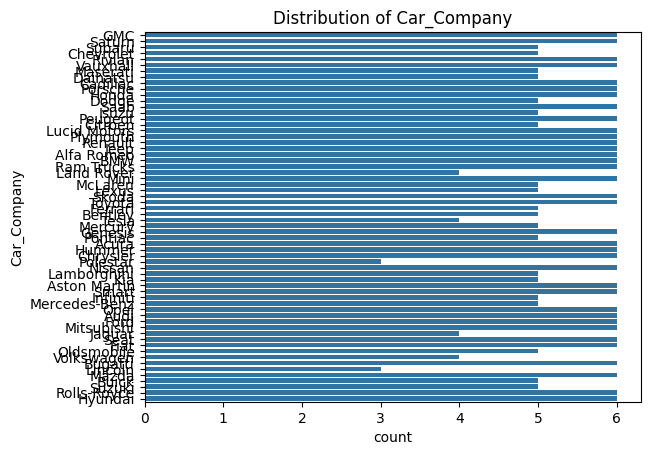

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of Car_Company
sns.countplot(data['Car_Company'])
plt.title('Distribution of Car_Company')
plt.show()

In [8]:
pip install seaborn

     |████████████████████████████████| 296kB 5.5MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
print(data.isnull().sum())

PRODUCT_ID                0
Car_Company               0
YIELD_RATE                0
SHIFT                     0
MACHINE_ID                0
OPERATOR_ID               0
MATERIAL_BATCH            0
TEMPERATURE               0
HUMIDITY                  0
DOWNTIME                  0
DEFECT_COUNT              0
MAINTENANCE_SCHEDULE      0
TRACK_OUT_DATE            0
MANUFACTURE_DATE          0
MODEL_NAME                0
YEAR_OF_MANUFACTURE       0
ENGINE_TYPE               0
FUEL_TYPE                 0
TRANSMISSION_TYPE         0
BODY_STYLE                0
Price                     0
Mileage                   0
SEATING_CAPACITY          0
COLOR_OPTIONS             0
SAFETY_FEATURES           0
Warranty_Period           0
Horsepower                0
Torque                    0
Top_Speed                 0
Acceleration              0
Dimensions                0
Weight                    0
Fuel_Tank_Capacity      103
dtype: int64


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot()
plt.show()